# STUDENT NAME, STUDENT NUMBER (TO BE FILLED BY THE STUDENT)

# Advanced Data Analysis - Assignment 2

This notebook contains the **Assignment 2** of the Advanced Data Analysis course.

The topic of the assignment consists in applying regression on National Health and Nutrition Examination data.

### DEADLINE: 13-October-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. While doing this assignment, you can use or adapt any code from the lectures if you want. 

Students have three grace days that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>
        
### Notebook Instructions
* You only need to deliver this notebook file (notice that, a notebook file extension is filename.ipynb) - Data files must not be submitted
* You don't need to create additional cells. Try to use the ones that are already available
* The notebook should be delivered with the outputs already available


# Considerations

Points were deducted in the following situations:
- If a cell does not run;
- If unucessary intermediate steps are presented;
- Even if the output is correct, but the code is too verbose (i.e. solution could be much simpler, given concepts taught in class).

# Dataset

The file children.csv contains a file with two columns. The first column is the age of each child in
months, and the second the weight in Kg. The data is from the National Health and Nutrition Examination
Survey of 2017-2018 and represents a sample of children up to 24 months old.

The following code loads the children.csv file 

In [22]:
# This code cell does not need to be changed
import os
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

dataFileName = os.path.join( "assignment2", "children.csv")
dataDF = pd.read_csv(dataFileName)
dataDF.head()


,age,weight
0,11.0,10.2
1,21.0,10.6
2,7.0,9.3
3,19.0,8.3
4,16.0,9.2


# Assignment

In this assignment, we aim to predict the weight of a children until 24 monthts old based on child age. 

## Question 1

In this question, we aim to create a linear regression model do predict the weight of a children based on his/her age. 

### **1.a)** Let's start by plotting the data in a scatter plot.  Is there any correlation between the weight and age of children?. In your opinion, is it reasonable to create a linear regression model to predict the weight of a children? (3 points out of 20). 

,age,weight
age,1.000000,0.879615
weight,0.879615,1.000000


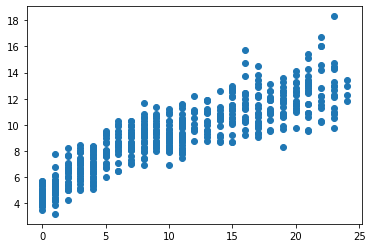

In [54]:
seed = 40

x = dataDF[['age']]
y = dataDF[['weight']]
plt.scatter(x, y)

dataDF.corr()

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models assume a linear relationship between the input variable (x) and the output (the target variable) that we want to predict.

So it's reasonable to use a linear regression model when there is a strong linear relationship between the input and the output. In our example, and after plotting the data, the weight and age are linear to some degree. This is later on confirmed by the Pearson correlation index, which is a statistical method that measures the strength and direction of linear relationship between two quantitative variables. Values closer to 1 means positive correlation, which in our case the value is 0.88.

In short, it seems to be reasonable to apply linear regression to this dataset. 

### **1.b)** Build a linear regression model and estimate the true error (5 out of 20) 

In [55]:
# Build linear regression model

train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed)

x_train = train_set[['age']]
y_train = train_set[['weight']]

x_test = test_set[['age']]
y_test = test_set[['weight']]

lmodel = linear_model.LinearRegression()
lmodel.fit(x_train, y_train)

LinearRegression()

In [56]:
lmodel_type = linear_model.LinearRegression()
estimate_error = cross_val_score(lmodel_type, x, y, scoring='neg_mean_squared_error', cv = 10).mean()

print(estimate_error)

-1.6362454439449432


To estimate true error, k-fold cross method was used because by using several partitions, we reduce the chance of having the estimate of the expected error (i.e., test error) influenced by the partition used and, as a result, have a more reliable estimate.

### **1.c)** Display in a visualization the data used to build the model as well as the model obtained. Finally,  write the equation of the model obtained (2 out of 20) 

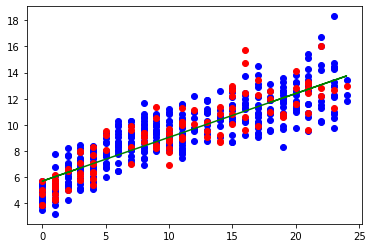

theta0 =  [5.70254107]
theta1 =  [[0.3348116]]


In [79]:
pred_train = lmodel.predict(x_train)

plt.scatter(x_train, y_train, c = 'b') # train set
plt.scatter(x_test, y_test, c = 'r') # test set

plt.plot(x_train['age'],pred_train, color = 'green') #  model
    
plt.show()

print('theta0 = ',lmodel.intercept_)
print('theta1 = ',lmodel.coef_)

## Equation = y = 0.33*age + 5.7

## Question 2 (10 points out of 20)

Here, we aim to find out if we can create a better model to predict the weigth of children based on their age.

### **2.a)** Evaluate polynomial model of degrees 1 through 10. What degree would you choose in order to have a better model when compared to the model built previously? Why? (7 out of 20)

In [83]:
seed = 10
def trans_data(degree, input):
    polynomial_features = PolynomialFeatures(degree)
    
    # Transform the original input data
    poly_trans = polynomial_features.fit_transform(input) # x is our initial variable that has all inputs
    input_df = pd.DataFrame(poly_trans)
    return input_df



In [84]:
model = linear_model.LinearRegression()

df = pd.DataFrame({'degree' : range(1, 11, 1)})

df['test_error'] = df['degree'].apply(lambda d: cross_val_score(model, trans_data(d, x), y, scoring='neg_mean_squared_error', cv = 10).mean())
df.sort_values('test_error', ascending=False)

## Notice that, with a different seed value the results may vary a bit.

,degree,test_error
9,10,-1.400844
7,8,-1.407285
2,3,-1.409529
3,4,-1.412721
8,9,-1.413343
6,7,-1.417251
4,5,-1.419276
5,6,-1.421643
1,2,-1.443860
0,1,-1.636245


### **2.b)** Using the best polynomial degree, find the coefficients of the best curve (3 points out of 20)

In [164]:
# Build linear regression model
train_set, test_set = train_test_split(dataDF, test_size = 0.2, random_state = seed)

x_train = train_set[['age']]
y_train = train_set[['weight']]

x_test = test_set[['age']]
y_test = test_set[['weight']]

pmodel = linear_model.LinearRegression()
pmodel.fit(trans_data(10, x_train), y_train)

print ('theta0 = ',pmodel.intercept_)
print ('theta1 = ',pmodel.coef_)

theta0 =  [4.62785592]
theta1 =  [[ 0.00000000e+00 -3.52561061e-01  1.69329977e+00 -9.85921023e-01
   2.85290283e-01 -4.70384883e-02  4.67694269e-03 -2.85183933e-04
   1.04255888e-05 -2.09619767e-07  1.78149762e-09]]
